## ポアソン合成
- 入力：
    - 貼り付け元のソース画像
    - 貼り付け元のソース画像のどの部分を貼り付けるか指定するマスク画像
    - 貼り付け先の背景画像
- 出力:
    - 合成画像

ここでは、ミキサー車を、道路画像にポアソン合成する
    - その際に、マスク画像どのように作成するかというのがあるが、ここでは、Grab-cutを用いてマスク画像を作成する
    - そこで作成したマスク画像をもとに、ポアソン合成を行う

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

In [2]:
DATA_DIR = '../data/'

In [3]:
mixer_truck = cv2.imread(DATA_DIR+"mixer_truck.jpg")
road = cv2.imread(DATA_DIR+"road.jpg")

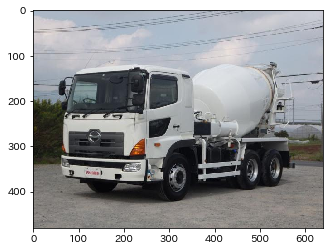

In [4]:
img = cv2.cvtColor(mixer_truck, cv2.COLOR_BGR2RGB)
plt.imshow(img)

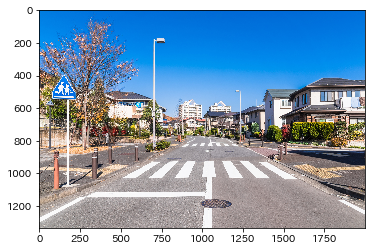

In [5]:
img = cv2.cvtColor(road, cv2.COLOR_BGR2RGB)
plt.imshow(img)

### Grab cutによるマスク

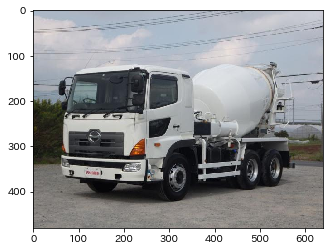

In [6]:
img = cv2.cvtColor(mixer_truck, cv2.COLOR_BGR2RGB)
plt.imshow(img)

### Grab-cut 1回目

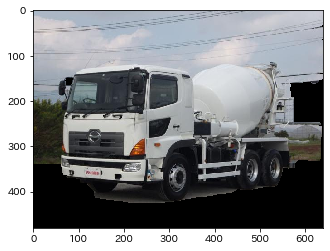

In [7]:
img = cv2.cvtColor(mixer_truck, cv2.COLOR_BGR2RGB)

mask1 = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)  # ここをいじるとエラーになる
fgdModel = np.zeros((1,65),np.float64)  # ここをいじるとエラーになる

rect = (0, 0, img.shape[1]-1, img.shape[0]-1)
cv2.grabCut(img, mask1, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask1==2)|(mask1==0), 0, 1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
mask2 = mask2*255

plt.imshow(img)#,plt.colorbar(),plt.show()

### 上記でマスクされた画像に対して、さらにGrab-cut

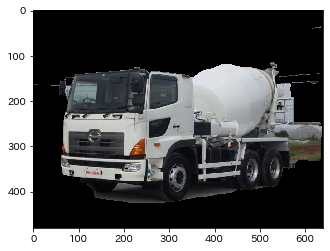

In [8]:
mask1 = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (1,1,img.shape[1]-1,img.shape[0]-1)  # ここを1回目とは少し変えている
cv2.grabCut(img, mask1, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask1==2)|(mask1==0), 0, 1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
mask2 = mask2*255

plt.imshow(img)#,plt.colorbar(),plt.show()

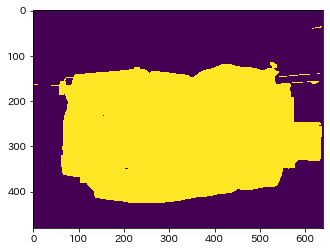

In [9]:
plt.imshow(mask2)

### ポアソン合成
- src: ミキサー車を、dst: 道路の画像に貼り付ける
- mask: 上記Grab-cutで作成したマスク


- 合成に関しては、opencvのcv2.seamlessCloneを使用する（ポアソン合成）
    - cv2.seamlessClone(src, dst, mask, center, cv2.NORMAL_CLONE)
    - src: 貼り付ける画像, dst: 貼り付け先の画像, mask: srcの貼り付ける部分のマスク
    - center: 貼り付け先の中心座標

In [10]:
src = deepcopy(mixer_truck)
dst = deepcopy(road)

In [11]:
# grab cutを利用した作成したマスク画像を、合成マスクとして使用
mask = mask2[:]

In [12]:
# src画像のリスケール
size_rate = 1
src_rescale = cv2.resize(src, (int(src.shape[1]*size_rate), int(src.shape[0]*size_rate)))
mask_rescale = cv2.resize(mask, (int(mask.shape[1]*size_rate), int(mask.shape[0]*size_rate)))

# print(src_rescale.shape)
# print(mask_rescale.shape)

# ポアソン合成
center = (dst.shape[1]//2, dst.shape[0]//2)
output = cv2.seamlessClone(src_rescale, dst, mask_rescale, center, cv2.NORMAL_CLONE)

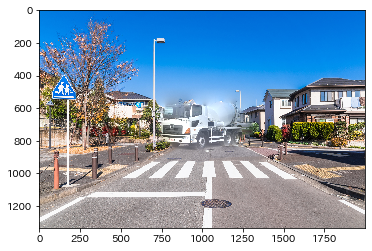

In [13]:
output = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
plt.imshow(output)

↑ 上記のように、背景画像の方の色に合わせる感じで合成されます


今回の場合は、背景切り取ってから、さらに背景と合成するので、色調としては問題なく合成出来るように思います